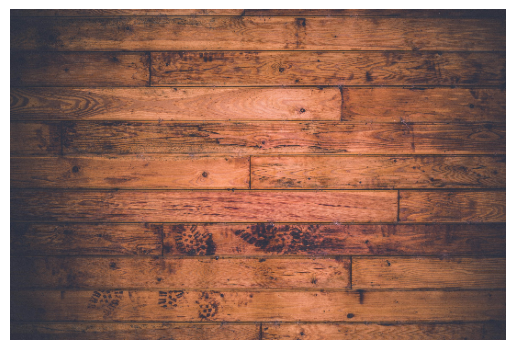

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
foreground_img = cv2.imread(r"C:\Users\saru5\OneDrive\Pictures\greenscreen_image.jpg")
background_img = cv2.imread(r"C:\Users\saru5\OneDrive\Pictures\background_image.jpg")

# Resize the background to match the foreground
background_img = cv2.resize(background_img, (foreground_img.shape[1], foreground_img.shape[0]))

# Convert the foreground image to HSV color space for better color range detection
hsv_foreground = cv2.cvtColor(foreground_img, cv2.COLOR_BGR2HSV)

# Define the green screen color range in HSV
lower_green = np.array([35, 40, 40])     # Lower bound for green
upper_green = np.array([85, 255, 255])   # Upper bound for green

# Create a mask for the green screen
mask = cv2.inRange(hsv_foreground, lower_green, upper_green)

# Invert the mask to get the non-green areas
mask_inv = cv2.bitwise_not(mask)

# Use the mask to extract the foreground
foreground = cv2.bitwise_and(foreground_img, foreground_img, mask=mask_inv)

# Use the inverted mask to extract the background area where the green screen was
background = cv2.bitwise_and(background_img, background_img, mask=mask)

# Combine the foreground and the new background
result = cv2.add(foreground, background)

# Convert BGR to RGB for displaying in matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display the result
plt.imshow(result_rgb)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()
